In [1]:
%matplotlib inline
#My observable trends are at the end
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
ride_data_to_load = "ride_data.csv"
city_data_to_load = "city_data.csv"

# Read the City and Ride Data

ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)


# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data, city_data, how="left", on=["city", "city"])


# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [3]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

# Bubble Plot of Ride Sharing Data

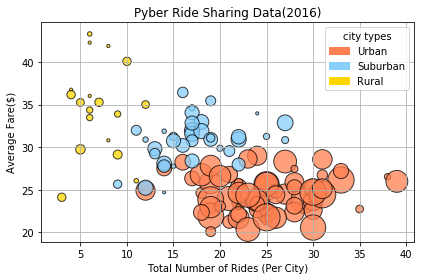

In [18]:
#Obtain the x and y coordinates for each of the three city types
u_x_axis = pyber_data_df.loc[pyber_data_df["type"] == 'Urban'].groupby("city")
u_x_axis = (u_x_axis["ride_id"].count())
u_x_axis

u_avg_fare = pyber_data_df.loc[pyber_data_df["type"] == 'Urban'].groupby("city")
u_avg_fare = (u_avg_fare["fare"].mean())
u_avg_fare

driver_count1 = pyber_data_df.loc[pyber_data_df["type"] == 'Urban'].groupby("city")
driver_count1 = (driver_count1["driver_count"].mean())
driver_count1

plt.scatter(u_x_axis, u_avg_fare, marker="o", c="coral", edgecolors="black", s=10*driver_count1, alpha=0.75)

s_x_axis = pyber_data_df.loc[pyber_data_df["type"] == 'Suburban'].groupby("city")
s_x_axis = (s_x_axis["ride_id"].count())
s_x_axis

s_avg_fare = pyber_data_df.loc[pyber_data_df["type"] == 'Suburban'].groupby("city")
s_avg_fare = (s_avg_fare["fare"].mean())
s_avg_fare

driver_count2 = pyber_data_df.loc[pyber_data_df["type"] == 'Suburban'].groupby("city")
driver_count2 = (driver_count2["driver_count"].mean())
driver_count2

plt.scatter(s_x_axis, s_avg_fare, marker="o", c='lightskyblue', edgecolors="black", s=10*driver_count2, alpha=0.75)

r_x_axis = pyber_data_df.loc[pyber_data_df["type"] == 'Rural'].groupby("city")
r_x_axis = (r_x_axis["ride_id"].count())
r_x_axis

r_avg_fare = pyber_data_df.loc[pyber_data_df["type"] == 'Rural'].groupby("city")
r_avg_fare = (r_avg_fare["fare"].mean())
r_avg_fare

driver_count3 = pyber_data_df.loc[pyber_data_df["type"] == 'Rural'].groupby("city")
driver_count3 = (driver_count3["driver_count"].mean())
driver_count3

plt.scatter(r_x_axis, r_avg_fare, marker="o", c='gold', edgecolors="black", s=10*driver_count3, alpha=0.75)

plt.grid(True)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.tight_layout()
plt.savefig("bubble_plot_ride_sharing.png")
red_patch = mpatches.Patch(color='coral', label='Urban')
blue_patch = mpatches.Patch(color='lightskyblue', label='Suburban')
yellow_patch = mpatches.Patch(color='gold', label='Rural')
plt.legend(handles=[red_patch, blue_patch, yellow_patch], title="city types")
plt.show()

# Total Fares by City Type

In [5]:
# Calculate Type Percents


# Save Figure


# counts the number of fares per city type
total_type_fares = pyber_data_df.groupby(["type"])
total_type_fares = (total_type_fares["fare"].sum())
total_type_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# Total fares fare all drivers
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [7]:
# Calculate Type Percents
type_percents = (total_type_fares/total_fares)*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

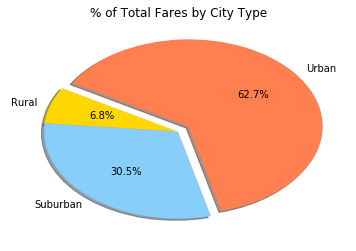

In [19]:
# Build Pie Chart
explode = (0,0,0.1)
colors = ["gold","lightskyblue","coral"]
plt.pie(type_percents, explode=explode, labels= ["Rural","Suburban","Urban"], colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.savefig("Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

In [9]:
# Calculate Ride Percents
# counts the number of rides per city type
total_type_rides = pyber_data_df.groupby(["type"])
total_type_rides = (total_type_rides["ride_id"].count())
total_type_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
#Calculates total rides
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [11]:
# Calculate total rides by type percents
ride_percents = (total_type_rides/total_rides)*100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

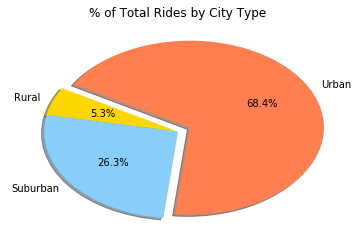

In [20]:
# Show Pie Figure & save
explode = (0,0,0.1)
colors = ["gold","lightskyblue","coral"]
plt.pie(ride_percents, explode=explode, labels= ["Rural","Suburban","Urban"], colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.savefig("Total Rides by City Type.png")
plt.show()


## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
# counts the number of drivers by city type
total_type_drivers = city_data.groupby(["type"])
total_type_drivers = (total_type_drivers["driver_count"].sum())
total_type_drivers


# Build Pie Charts

# Save Figure


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [14]:
#Calculates total drivers
total_drivers = city_data["driver_count"].sum()
total_drivers

2973

In [15]:
# Calculate total drivers by type percents
driver_percents = (total_type_drivers/total_drivers)*100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

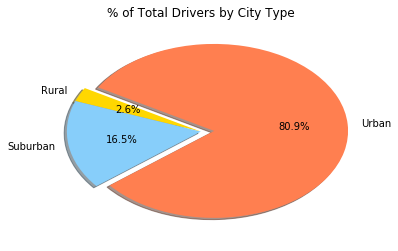

In [21]:
# Show Pie Figure & save
explode = (0,0,0.1)
colors = ["gold","lightskyblue","coral"]
plt.pie(driver_percents, explode=explode, labels= ["Rural","Suburban","Urban"], colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.savefig("Total Drivers by City Type.png")
plt.show()

My observable trends:
    

Fares increase in price and decrease in rides taken in smaller rural area.  As the number of rides increases in more populated areas in urban areas it brings the average fare lower.  Drivers in total earn the largest percentage of fares and give more rides in larger populated areas.  There are less drivers in suburban areas than urban giving more rides than their counterparts in the urban areas.  Rural and suburban drivers are able to take advantage of their scarcity and charge higher fares and for less rides than their urban drivers.  
